$$
\ddot{x}=-\omega_s^2x-2D\omega_s\dot{x}+\sin{[\Phi(t)]}.
$$

$$
\Phi(t) = \omega_0 t + \frac{\varepsilon}{2}\cdot t^2
$$

$D=0.02$, $\omega_0 =0$, $\varepsilon = 0.002\omega_s^2$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [2]:
def linramp(t, eps, om0):
    return om0*t+eps*t**2/2

def linosc(y, t, om0, eps, om):
    return [y[1], -2*0.02*om*y[1] -
          (om**2)*y[0] +
          np.sin(linramp(t, eps*om**2, om0))]


Resonance frequency: $$\omega_r = \sqrt{\omega_s^2 - \frac{4D^2\omega_s^2}{2}} = \omega_s \sqrt{1- 2D^2} \sim \omega_s$$

In [3]:
oms = 0.7
eps = 2*1e-2*oms**2
omegaRes = oms*np.sqrt(1-2*0.02**2)


In [4]:
print(omegaRes)

0.6997199439775887


## Changing the oscillator's frequency, $\omega_s$

In [7]:
t = np.arange(0., 3*1.4/eps, eps)
sol = odeint(linosc, [0.00, 0.00], t, args=(0.0, eps, oms))


C:\Users\balin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5,1,'$\\omega_s = 0.7$')

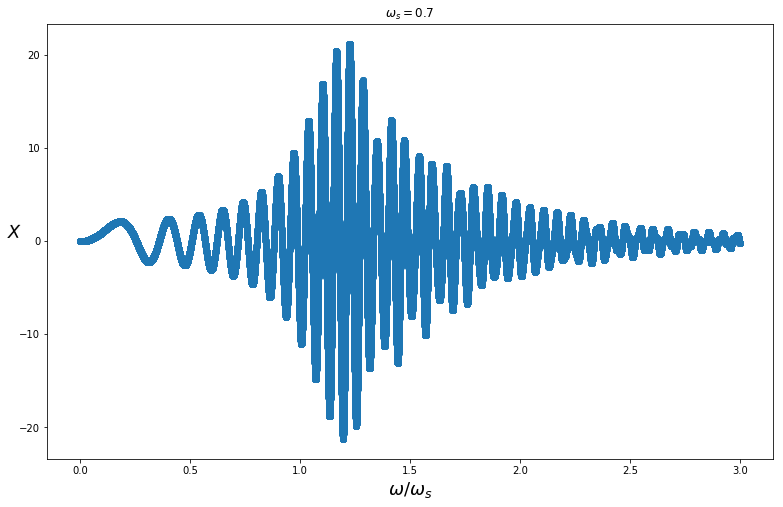

In [8]:
plt.figure(figsize=(13,8))

plt.plot(linramp(t, eps, 0.)/(t*oms), sol[:,0], 'o')
plt.xlabel('$\omega / \omega_s$', fontsize=18)
plt.ylabel('$X$', fontsize=18, rotation = 1)
plt.title('$\omega_s = 0.7$')

C:\Users\balin\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


Text(0.5,1,'$\\omega_s = 0.5$')

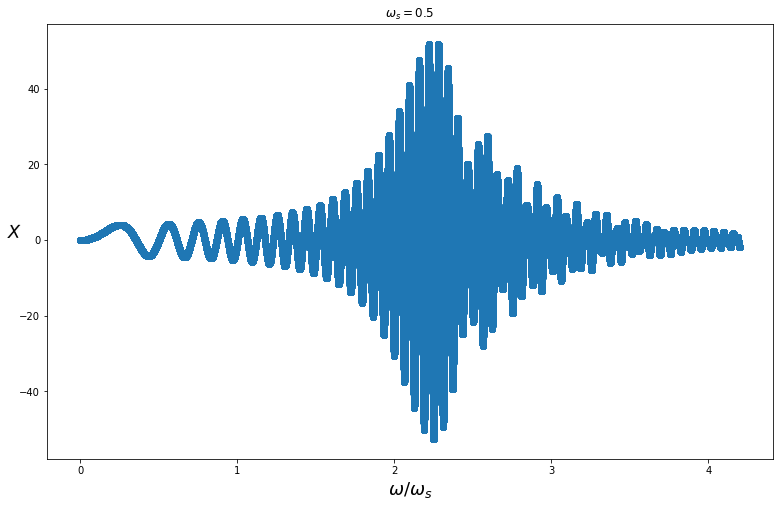

In [9]:
oms = 0.5
eps = 2*1e-2*oms**2
omegaRes = oms*np.sqrt(1-2*0.02**2)

t = np.arange(0., 3*1.4/eps, eps)
sol = odeint(linosc, [0.00, 0.00], t, args=(0.0, eps, oms))
plt.figure(figsize=(13,8))

plt.plot(linramp(t, eps, 0.)/(t*oms), sol[:,0], 'o')
plt.xlabel('$\omega / \omega_s$', fontsize=18)
plt.ylabel('$X$', fontsize=18, rotation = 1)
plt.title('$\omega_s = %s$' %oms)

C:\Users\balin\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


Text(0.5,1,'$\\omega_s = 1.0$')

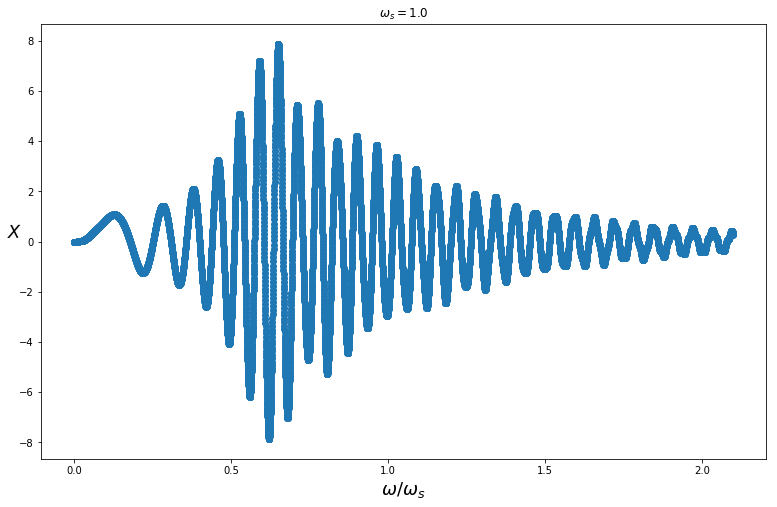

In [10]:
oms = 1.
eps = 2*1e-2*oms**2
omegaRes = oms*np.sqrt(1-2*0.02**2)

t = np.arange(0., 3*1.4/eps, eps)
sol = odeint(linosc, [0.00, 0.00], t, args=(0.0, eps, oms))
plt.figure(figsize=(13,8))

plt.plot(linramp(t, eps, 0.)/(t*oms), sol[:,0], 'o')
plt.xlabel('$\omega / \omega_s$', fontsize=18)
plt.ylabel('$X$', fontsize=18, rotation = 1)
plt.title('$\omega_s = %s$' %oms)

C:\Users\balin\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


Text(0.5,1,'$\\omega_s = 0.8$')

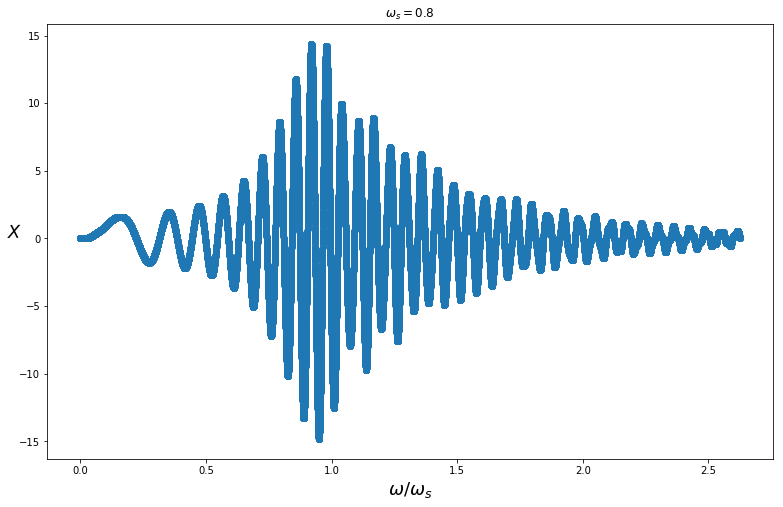

In [11]:
oms = 0.8
eps = 2*1e-2*oms**2
omegaRes = oms*np.sqrt(1-2*0.02**2)

t = np.arange(0., 3*1.4/eps, eps)
sol = odeint(linosc, [0.00, 0.00], t, args=(0.0, eps, oms))
plt.figure(figsize=(13,8))

plt.plot(linramp(t, eps, 0.)/(t*oms), sol[:,0], 'o')
plt.xlabel('$\omega / \omega_s$', fontsize=18)
plt.ylabel('$X$', fontsize=18, rotation = 1)
plt.title('$\omega_s = %s$' %oms)

In [57]:
def getMaxFrequency(omss):
    eps = 2*1e-2*omss**2

    t = np.arange(0., 3*1.4/eps, eps)
    sol = odeint(linosc, [0.00, 0.00], t, args=(0.0, eps, omss))
    maxplace = np.argmax(sol[:,0])
    return linramp(t[maxplace], eps, 0.)/(t[maxplace]*omss)

In [58]:
resonances = []

In [59]:
omegas = np.arange(0.5, 1.1, 0.001)
for o in omegas:
    resonances.append(getMaxFrequency(o))

In [63]:
resonances = np.array(resonances)
isone = resonances[np.abs(resonances-1.)<0.01]


Text(0,0.5,'$Resonance Freq / \\omega_s$')

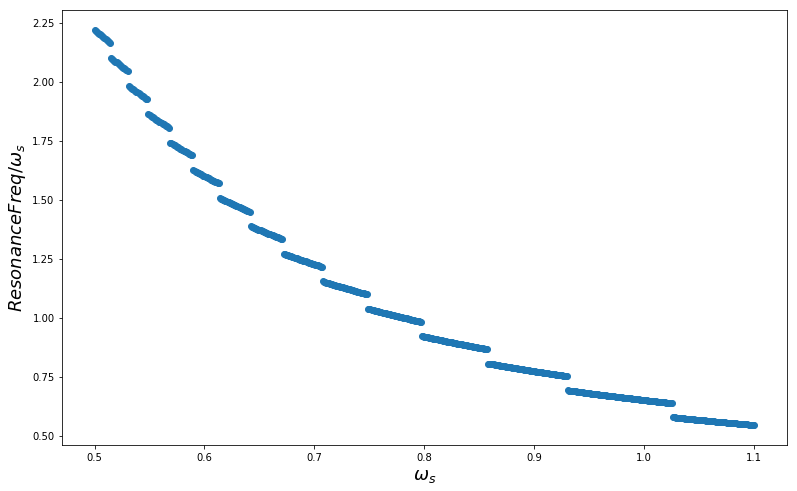

In [60]:
plt.figure(figsize=(13,8))
plt.plot(omegas, resonances, 'o')
plt.xlabel('$\omega_s$',fontsize=18)
plt.ylabel('$Resonance Freq / \omega_s$',fontsize=18)


## Minimal difference:

In [65]:
minimal = np.min(np.abs(resonances-1.))
print(minimal)

place = np.where(np.logical_or(resonances == 1-minimal, resonances == 1 + minimal))[0] 
print(omegas[place])

0.00026989525739884446
[0.781]


C:\Users\balin\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


Text(0.5,1,'$\\omega_s = 0.781$')

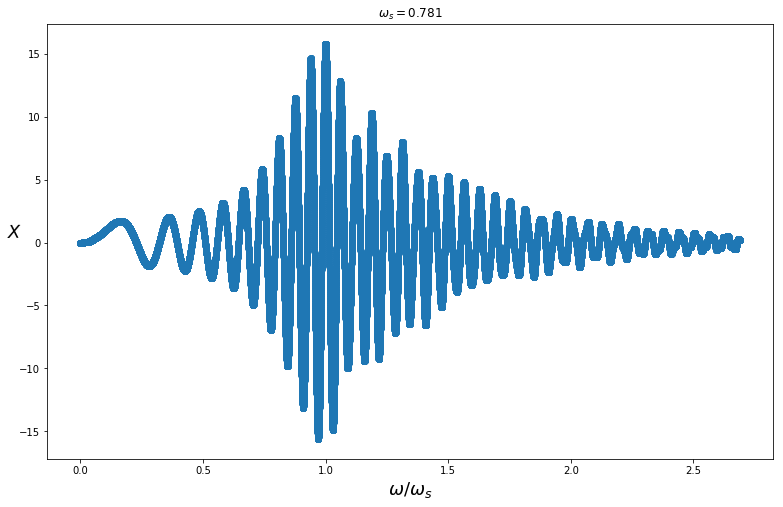

In [66]:
oms = 0.781
eps = 2*1e-2*oms**2
omegaRes = oms*np.sqrt(1-2*0.02**2)

t = np.arange(0., 3*1.4/eps, eps)
sol = odeint(linosc, [0.00, 0.00], t, args=(0.0, eps, oms))
plt.figure(figsize=(13,8))

plt.plot(linramp(t, eps, 0.)/(t*oms), sol[:,0], 'o')
plt.xlabel('$\omega / \omega_s$', fontsize=18)
plt.ylabel('$X$', fontsize=18, rotation = 1)
plt.title('$\omega_s = %s$' %oms)

In [1]:
from scipy import special

C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [53]:
def v(t, om):
    pre = (1.+1j)/(2*np.sqrt(0.002))
    return pre*(0.002 *t + (0+1j)*(-0.02 + (0+1j)*np.sqrt(1-0.02**2)))

In [63]:
def w(v):
    return np.exp(-v**2)*(1 - special.erfi(v))

In [64]:
oms = 0.7
eps = 0.002
omegaRes = oms*np.sqrt(1-2*0.02**2)

t = np.arange(0., 3*1.4/eps, eps)
result = []
for time in t:
    v1 = v(time, omega)
    result.append(w(v1))


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


Text(0.5, 1.0, '$\\omega_s = 0.7$')

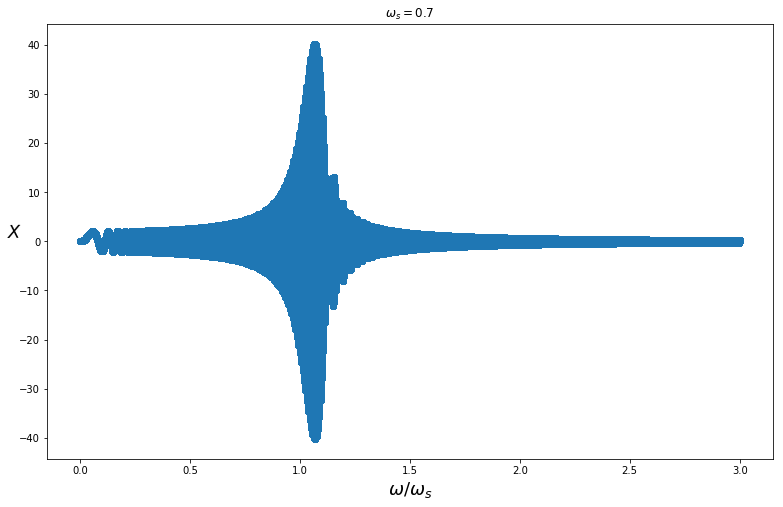

In [29]:
t = np.arange(0., 3*1.4/eps, eps)

sol = odeint(linosc, [0.00, 0.00], t, args=(0.0, eps, oms))
plt.figure(figsize=(13,8))

plt.plot(linramp(t, eps, 0.)/(t*oms), sol[:,0], 'o')

plt.xlabel('$\omega / \omega_s$', fontsize=18)
plt.ylabel('$X$', fontsize=18, rotation = 1)
plt.title('$\omega_s = %s$' %oms)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


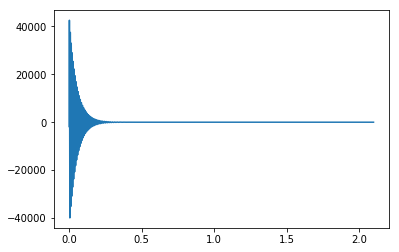

In [62]:
plt.plot(linramp(t, eps, 0.)/(t), result)

In [ ]:
def linramp(t, eps, om0):
    return om0*t+eps*t**2/2

def linosc(y, t, om0, eps, om):
    return [y[1], -2*0.02*om*y[1] -
          (om**2)*y[0] +
          np.sin(linramp(t, eps*om**2, om0))]


In [3]:
eps = 1e-4
t = np.arange(0., 1.4/eps, eps)

sol = odeint(linosc, [0.00, 0.00], t, args=(0.6, eps, 1.))
plt.figure(figsize=(13,8))

plt.plot(linramp(t, eps, 0.6)/(t), sol[:,0], 'o')

plt.xlabel('$\omega / \omega_s$', fontsize=18)
plt.ylabel('$X$', fontsize=18, rotation = 1)
plt.title('$\omega_s = 1$)

MemoryError: 

## Eq. of motion

$$
\ddot{X} + 2D\dot{X} + X = A_0 P(t)
$$

$$
P(t) = \cos \varphi(t)
$$

$$\varphi(t) = \frac{\alpha}{2}t^2 + \eta_0 t + \beta$$


Envelope curve is $Q(t) = B_1 w(v_1(t)) + B_2 w(v_2(t)) + C_1 e^{v_1^2(t) - v_1(t)^2} + C_2 e^{v_2^2(t) - v_2(t)^2}$

In [3]:
from scipy.special import wofz
def w(x):
    return wofz(x)

Text(0, 0.5, '$w(X)$')

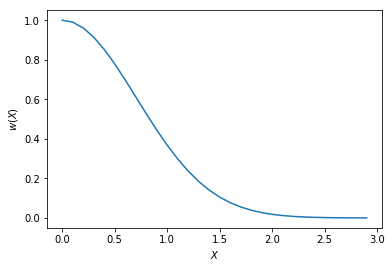

In [12]:
x = np.arange(0., 3., 0.1)
plt.plot(x, w(x), '-')
plt.xlabel('$X$')
plt.ylabel('$w(X)$')

In [76]:
## Parameters:
ipos = 0.
ivelocity = 0.

D = 0.02
alpha = 1e-4
eta0 = 0.6
A0 = 1.
beta = 0.

lambda1 = -D + (0+1j)*np.sqrt(1.-D**2)
lambda2 = -D - (0+1j)*np.sqrt(1.-D**2)

In [77]:
def v1(t):
    prefac = -(1+1j)/(2*np.sqrt(alpha))
    linear = alpha*t + eta0 + (0+1j)*lambda1
    return prefac*linear

def v2(t):
    prefac = (1+1j)/(2*np.sqrt(alpha))
    linear = alpha*t + eta0 + (0+1j)*lambda2
    return prefac*linear



In [78]:
B1 = (1. - 1j)/(4*np.sqrt(1.-D**2))*np.sqrt(np.pi/alpha)*A0
B2 = (1. - 1j)/(4*np.sqrt(1.-D**2))*np.sqrt(np.pi/alpha)*A0

C1 = (lambda2*ipos - ivelocity)*np.exp(-1j*beta)/(lambda2-lambda1) - B1*w(v1(0))
C2 = (lambda1*ipos - ivelocity)*np.exp(-1j*beta)/(lambda1-lambda2) - B2*w(v2(0))



In [79]:
def Q(t):
    return B1*w(v1(t)) + B2*w(v2(t)) + C1*np.exp(v1(0)**2 - v1(t)**2) + C2*np.exp(v2(0)**2 - v2(t)**2)

In [80]:
def linramp(t):
    return alpha*t + eta0

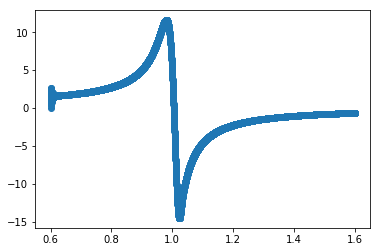

In [81]:
x = np.arange(0., 1/alpha, 1)
plt.plot(linramp(x), Q(x), '-o')

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt


In [13]:
def linramp(t, eps, om0):
    return om0*t+eps*t**2/2

def model(y, t, eps, om0):
    return [y[1], -0.1*y[1] -
          np.sin(y[0]) +
          np.cos(linramp(t, eps, om0))*np.cos(y[0])]
def modelsteps(y, t):
    return [y[1], -0.1*y[1] -
          np.sin(y[0]) +
          np.cos(steps(t)*t)*np.cos(y[0])]


def model2(y, t, omega):
    return [y[1], -0.1*y[1] -
          np.sin(y[0]) +
          np.cos(omega*t)*np.cos(y[0])]




def linoscSteps(y, t):
    omega = steps(t)
    return [y[1], -0.1*y[1] -
          y[0] +
          np.sin(omega*t)]

def contract(y):
    while (y < -np.pi) or (y > np.pi):
        if(y < -np.pi):
            y = y + 2.*np.pi
        if(y > np.pi):
            y = y - 2.*np.pi
    return y

contract = np.vectorize(contract)

In [4]:
period = 2.*np.pi
t = np.arange(0., 10000*period, 0.1)

om = np.linspace(0.6, 1.6, 100)
pendulum = []
for o in om:
    sol = odeint(model2, [0., 0.], t, args=( o, ))

    amp = np.max(np.abs(sol[:,1][40000:]**2))
    pendulum.append([o, amp])
    
pendulum = np.array(pendulum)

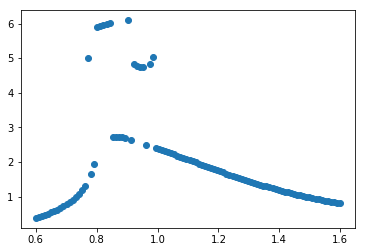

In [5]:
plt.plot(pendulum[:,0], pendulum[:,1], 'o')

In [38]:
def IF(t, alpha, eta0):
    return alpha*t + eta0

def omega(t):
    return (alpha/2.)*t + eta0
def whereIsResonance(alph):
    x = np.arange(0., 1/alph, 0.1)
    sol = odeint(model, [0., 0.], x, args=( alph, 0.6, ))
    peaks, _ = find_peaks(np.abs(sol[:,1]), height=2.0)

    return IF(x[peaks[0]], alph, 0.6)

In [46]:
eps = np.logspace(-3, -5, 40)

In [50]:
epss = np.hstack((np.logspace(-1, -6, 10),eps))

In [40]:
ress = []


In [47]:
for e in eps:
    ress.append(whereIsResonance(e))

(0.8, 0.9)

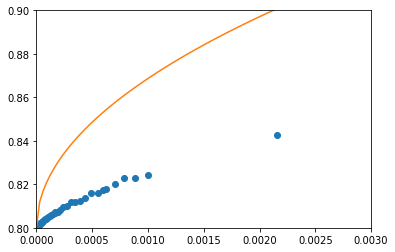

In [60]:
plt.plot(epss, ress, 'o')
x = np.arange(0., 0.003, 0.00003)
plt.plot(x, 1.6/2+np.sqrt(2*(3/4)*np.pi*x), '-')

plt.xlim(0., 0.003)
plt.ylim(1.6/2,3*3*0.1)

In [43]:
alph = 0.1
x = np.arange(0., 1/alph, 0.1)
sol = odeint(model, [0., 0.], x, args=( alph, 0.6, ))

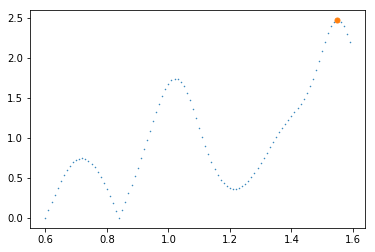

In [45]:
from scipy.signal import find_peaks
peaks, _ = find_peaks(np.abs(sol[:,1]), height=2.0)
plt.plot(IF(x, alph, 0.6), np.abs(sol[:,1]), 'o', markersize=0.5)
plt.plot(IF(x, alph, 0.6)[peaks], np.abs(sol[:,1])[peaks], 'o', markersize=5.)



In [30]:
alph = 0.0003
x = np.arange(0., 1/alph, 0.1)
sol = odeint(model, [0., 0.], x, args=( alph, 0.6, ))

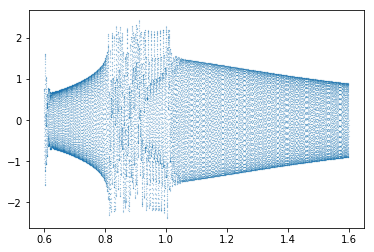

In [31]:
plt.plot(IF(x, alph, 0.6), sol[:,1], 'o', markersize=0.1)